In [8]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('data_csv/oscar_merged.csv')
average_age_gender = df.groupby('gender')['age'].mean().round(0)

average_age_gender

gender
F    36.0
M    44.0
Name: age, dtype: float64

In [10]:
df_most_win = df['name'].value_counts()

In [11]:
most_common_names = df_most_win[df_most_win >= 2]
most_common_names

name
Katharine Hepburn      4
Daniel Day-Lewis       3
Marlon Brando          2
Tom Hanks              2
Frances McDormand      2
Hilary Swank           2
Elizabeth Taylor       2
Jodie Foster           2
Olivia de Havilland    2
Ingrid Bergman         2
Sean Penn              2
Gary Cooper            2
Vivien Leigh           2
Spencer Tracy          2
Meryl Streep           2
Luise Rainer           2
Glenda Jackson         2
Jane Fonda             2
Dustin Hoffman         2
Sally Field            2
Fredric March          2
Jack Nicholson         2
Bette Davis            2
Name: count, dtype: int64

In [27]:
decade_bins = range(1920, 2020, 10)
average_age_decade = df.groupby([pd.cut(df['year'], bins=decade_bins),'gender'])['age'].mean().round(0).reset_index(name='average_age')

/tmp/ipykernel_818/2861089690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_age_decade = df.groupby([pd.cut(df['year'], bins=decade_bins),'gender'])['age'].mean().round(0).reset_index(name='average_age')


In [33]:
avg_age_fem = average_age_decade[average_age_decade['gender']=='F'][['year', 'average_age']]
avg_age_fem

,year,average_age
0,"(1920, 1930]",38.0
2,"(1930, 1940]",28.0
4,"(1940, 1950]",33.0
6,"(1950, 1960]",36.0
8,"(1960, 1970]",37.0
10,"(1970, 1980]",35.0
12,"(1980, 1990]",46.0
14,"(1990, 2000]",35.0
16,"(2000, 2010]",36.0


In [32]:
avg_age_male = average_age_decade[average_age_decade['gender']=='M'][['year', 'average_age']]
avg_age_male

,year,average_age
1,"(1920, 1930]",50.0
3,"(1930, 1940]",38.0
5,"(1940, 1950]",44.0
7,"(1950, 1960]",42.0
9,"(1960, 1970]",45.0
11,"(1970, 1980]",44.0
13,"(1980, 1990]",48.0
15,"(1990, 2000]",44.0
17,"(2000, 2010]",45.0


In [46]:
genre_colors = ['cyan','pink']
avg_age_male

,year,average_age
1,"(1920, 1930]",50.0
3,"(1930, 1940]",38.0
5,"(1940, 1950]",44.0
7,"(1950, 1960]",42.0
9,"(1960, 1970]",45.0
11,"(1970, 1980]",44.0
13,"(1980, 1990]",48.0
15,"(1990, 2000]",44.0
17,"(2000, 2010]",45.0


<Axes: xlabel='year'>

<Figure size 640x480 with 0 Axes>

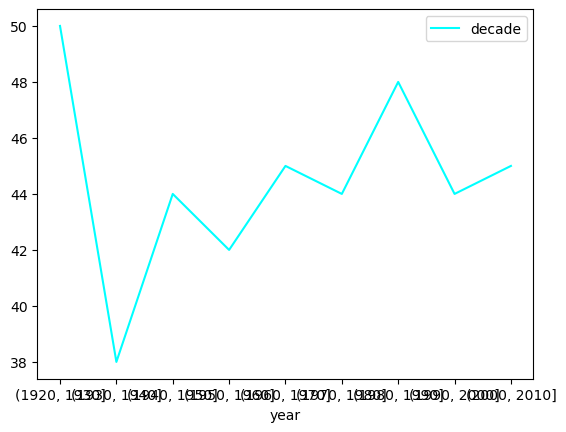

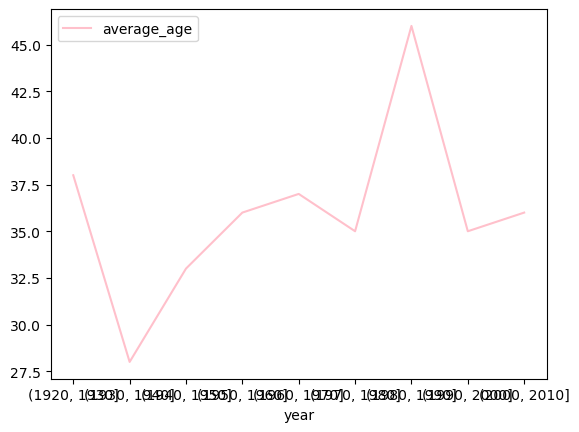

In [56]:
plt.figure()

#average_age_decade.plot(kind='hist', bins=10, edgecolor='black')
avg_age_male.plot(x='year', y='average_age',color = 'cyan')
avg_age_fem.plot(kind=bar,x='year', y='average_age', color='pink')
